<a href="https://colab.research.google.com/github/Ravali-Thumati/2303A52408-generative-ai/blob/main/lab10_2408.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical



In [3]:
# 1. Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# 2. Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(33, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for digits 0-9


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# 4. Train the model
epochs = 30
batch_size = 32

history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2) # 20% validation for monitoring training

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.9033 - loss: 0.3166 - val_accuracy: 0.9805 - val_loss: 0.0627
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9836 - loss: 0.0525 - val_accuracy: 0.9884 - val_loss: 0.0413
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 0.9883 - val_loss: 0.0417
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.9925 - loss: 0.0211 - val_accuracy: 0.9893 - val_loss: 0.0387
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9950 - loss: 0.0157 - val_accuracy: 0.9862 - val_loss: 0.0536
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9885 - val_loss: 0.0411
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.9971 - loss: 0.0083 - val_accuracy: 0.9872 - val_loss: 0.0506
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9971 -

In [7]:
# 5. Evaluate the model
train_loss, train_acc = model.evaluate(train_images, train_labels)
test_loss, test_acc = model.evaluate(test_images, test_labels)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9997 - loss: 0.0018
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9891 - loss: 0.0632


In [8]:
# 6. Print the results
print(f'Training Accuracy: {train_acc * 100:.2f}%')
print(f'Testing Accuracy: {test_acc * 100:.2f}%')


Training Accuracy: 99.83%
Testing Accuracy: 99.14%


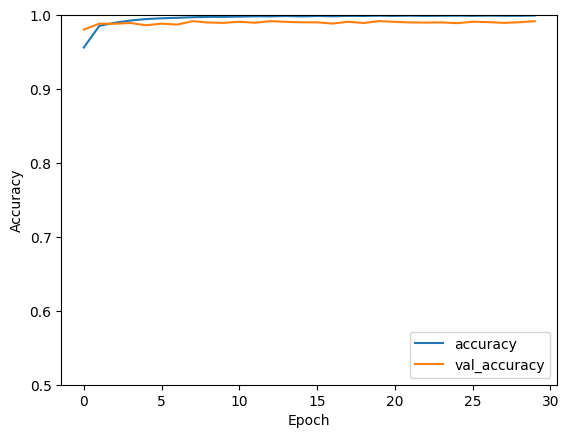

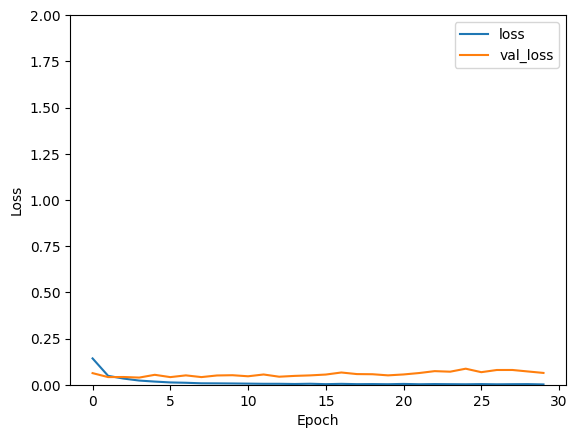

In [9]:
#Optional: Plotting the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.show()